#EDA with Python and applying Logistic Regression

In [1]:
##Import Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
## THE DATA

#lets start reading in the titanic_train.csv file into pandas dataframe

In [199]:
train=pd.read_csv("C:\\Users\\Prema\\Downloads\\archive.zip")

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
train.shape

(891, 12)

In [153]:
## Exploratory Data Analysis
#Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [154]:
# Missing Data
# We will use seaborn to check our missing data

In [155]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Some of the observations wer can check from above that there are 5 columns in integers and 5 category column and 1 in float column.
# for data analysis we need to convert some columns from int dtype to category dtype.


In [157]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
# from the above obove observations we can check that CABIN column has more than 70 percent data is missing and for AGE column
# more than 20 percent of data is missing and only 2 values are missing in Embarked column.

<AxesSubplot:>

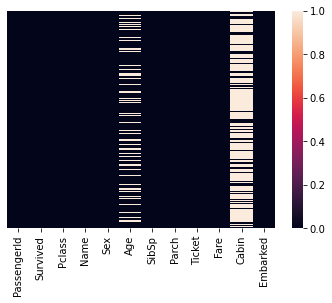

In [159]:
sns.heatmap(train.isnull()==True,yticklabels=False)

# Handle missing Values

In [160]:
# So from the above observarions we will drop the Cabin column also Passesnger id is unique column we do not really need them.

In [200]:
train.drop(columns=['Cabin'],inplace=True)
train.drop(columns=['PassengerId'],inplace=True)

<AxesSubplot:>

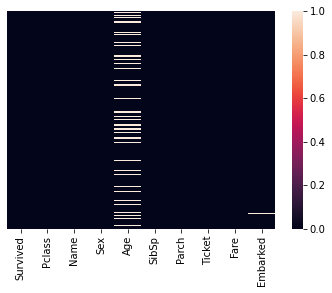

In [201]:
sns.heatmap(train.isnull()==True,yticklabels=False)

In [202]:
# Now we will impute missing values in Age column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

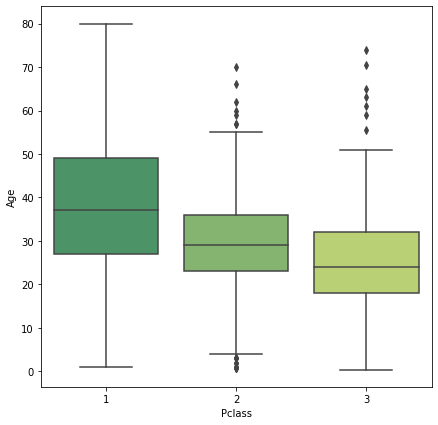

In [203]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

In [204]:
# from the above observartion we can see that the older people are present in class 1 which also make sense also it in passenger 
# 2 the average age decreases and so on. So we will use this method to impute missing values in Age accoring to the Pclass.


# Also we will impute those 2 missing values in Emabrked column with mode.

In [205]:
def age_impute(age_pclass):
    age=age_pclass[0]
    pclass=age_pclass[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
    
        elif pclass==2:
            return 30
    
        else:
            return 25
    
    else:
        return(age)
    

In [206]:
train['Age'] = train[['Age','Pclass']].apply(age_impute,axis=1)

In [207]:
train['Embarked'].value_counts()
train['Embarked']=train['Embarked'].fillna('S',inplace=True)

<AxesSubplot:>

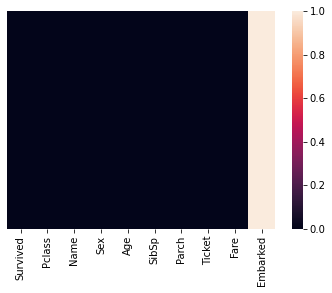

In [208]:
sns.heatmap(train.isnull()==True,yticklabels=False)

# Yippee! We do not have more missing values.

In [209]:
# Now we will change some of the interger columns into category columns.

## Survived column
## Pclass

In [210]:
train['Survived']=train['Survived'].astype('object')
train['Pclass']=train['Pclass'].astype('object')

In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  0 non-null      object 
dtypes: float64(2), int64(2), object(6)
memory usage: 69.7+ KB


# five point Summary

In [212]:
train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.231392,0.523008,0.381594,32.204208
std,13.191115,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,26.000000,0.000000,0.000000,14.454200
75%,37.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

Out of 891 population 62 % people died in titanic accident


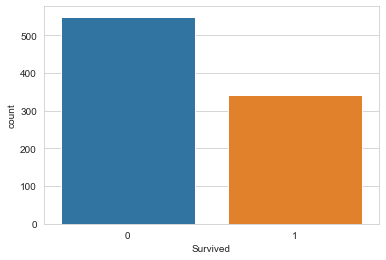

In [213]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

death_percent=round((train['Survived'].value_counts().values[0]/891)*100)
print('Out of 891 population {} % people died in titanic accident'.format(death_percent))



3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

 55% of population tavelling in passenger class: 3 
 20 % of population tavelling in passenger class:2 
 24 % of population tavelling in passenger class:1


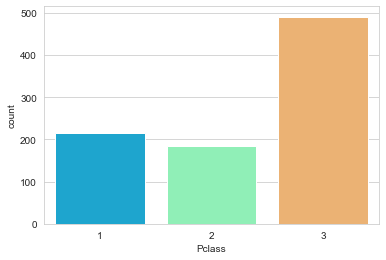

In [155]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=train,palette='rainbow')

traveller=print((train['Pclass'].value_counts()/891)*100)
print('\n','55% of population tavelling in passenger class: 3','\n',
      '20 % of population tavelling in passenger class:2','\n',
      '24 % of population tavelling in passenger class:1')

In [156]:
#From the above we are cocluding that most of the people who have died are actually from Pclass 3 and the people survied
#are from pclass 1.

male      65.0
female    35.0
Name: Sex, dtype: float64

 65% of population tavelling is male 
 35 % of population tavelling is female


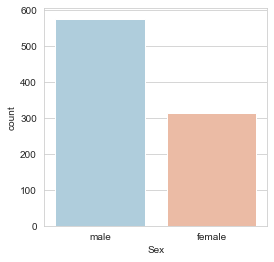

In [157]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex',data=train,palette='RdBu_r')
male_female=print(round((train['Sex'].value_counts()/891*100)))
print('\n','65% of population tavelling is male','\n',
      '35 % of population tavelling is female')

C:\Users\Prema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    72.0
C    19.0
Q     9.0
Name: Embarked, dtype: float64

 72% of population tavelling from S 
 19 % of population tavelling is C 
 9% of population are from Q


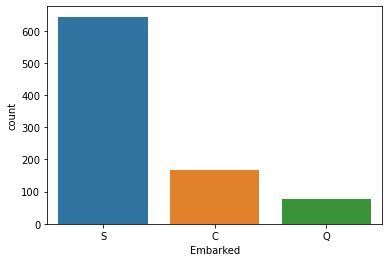

In [6]:
sns.countplot(train['Embarked'],data=train)
print(round((train['Embarked'].value_counts()/891*100)))
print('\n','72% of population tavelling from S','\n',
      '19 % of population tavelling is C','\n','9% of population are from Q')

0    68.0
1    23.0
2     3.0
4     2.0
3     2.0
8     1.0
5     1.0
Name: SibSp, dtype: float64


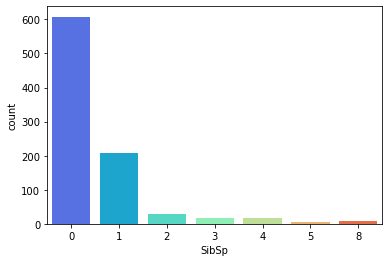

In [5]:
sns.countplot(x='SibSp',data=train,palette='rainbow')
count=print(round(train['SibSp'].value_counts()/891*100))

# Almost 68% percent of the people are travelling without any spouce and siblings and 23% people have either sibling and spouce.

people ages between 0 and 20 are : 179
People ages between 20 and 50 are : 648
People ages above 50 : 64


<Figure size 288x288 with 0 Axes>

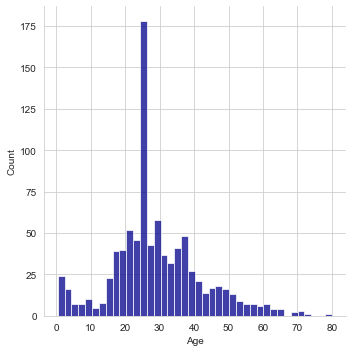

In [159]:
plt.figure(figsize=(4,4))
sns.displot(train['Age'].dropna(),bins=40,color='darkblue')

print('people ages between 0 and 20 are :', train[(train['Age']<=20)&(train['Age']>=0)].shape[0])
print('People ages between 20 and 50 are :', train[(train['Age']>20) &(train['Age']<=50)].shape[0])
print('People ages above 50 :', train[(train['Age']>50)].shape[0])


C:\Users\Prema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

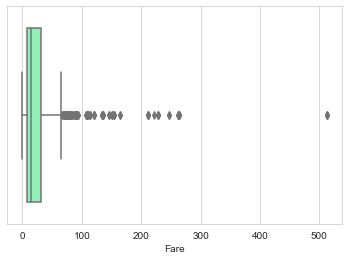

In [160]:
sns.boxplot(train['Fare'],palette='rainbow')

people fare between $0 and $50 are : 731
people fare between $50 and $100 are : 107
People ages between $100 and $250 are : 44
People ages above $250 : 9


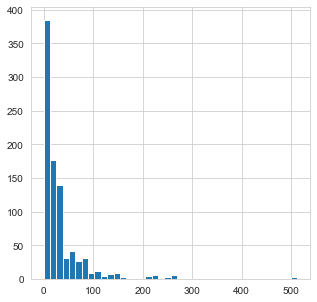

In [161]:
train['Fare'].hist(figsize=(5,5),bins=40)
print('people fare between $0 and $50 are :', train[(train['Fare']<=50)&(train['Fare']>=0)].shape[0])
print('people fare between $50 and $100 are :', train[(train['Fare']<=100)&(train['Fare']>50)].shape[0])
print('People ages between $100 and $250 are :', train[(train['Fare']>100) &(train['Fare']<=250)].shape[0])
print('People ages above $250 :', train[(train['Fare']>250)].shape[0])


In [214]:
train=train[train['Fare']<150]

In [215]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,None
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,None
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None


In [162]:
## Multivariate Aanalysis

Sex,female,male
Survived,,
0,26.0,81.0
1,74.0,19.0


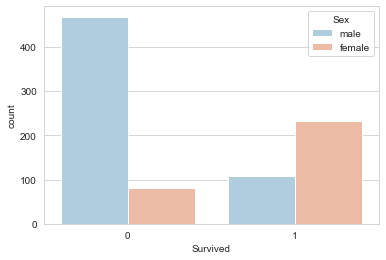

In [163]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
pd.crosstab(train['Survived'],train['Sex']).apply(lambda x:round((x/x.sum())*100))

# 81% Males died in Titanic accident is way more than female died.

Pclass,1,2,3
Survived,,,
0,37.0,53.0,76.0
1,63.0,47.0,24.0


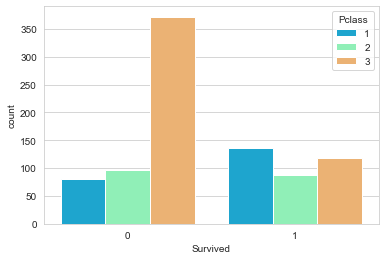

In [164]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
pd.crosstab(train['Survived'],train['Pclass']).apply(lambda x:round((x/x.sum())*100))

## 76% of people dided in the titanic accident are from passenger class 3.

C:\Users\Prema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Embarked,C,Q,S
Survived,,,
0,45.0,61.0,66.0
1,55.0,39.0,34.0


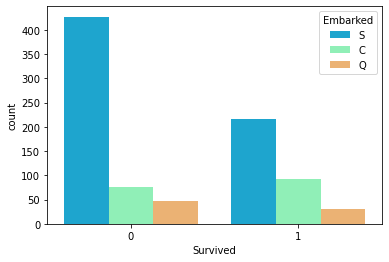

In [7]:
sns.countplot(train['Survived'],hue=train['Embarked'],data=train,palette='rainbow')
pd.crosstab(train['Survived'],train['Embarked']).apply(lambda x:round((x/x.sum())*100))

# 66% of the population died are going to city S.


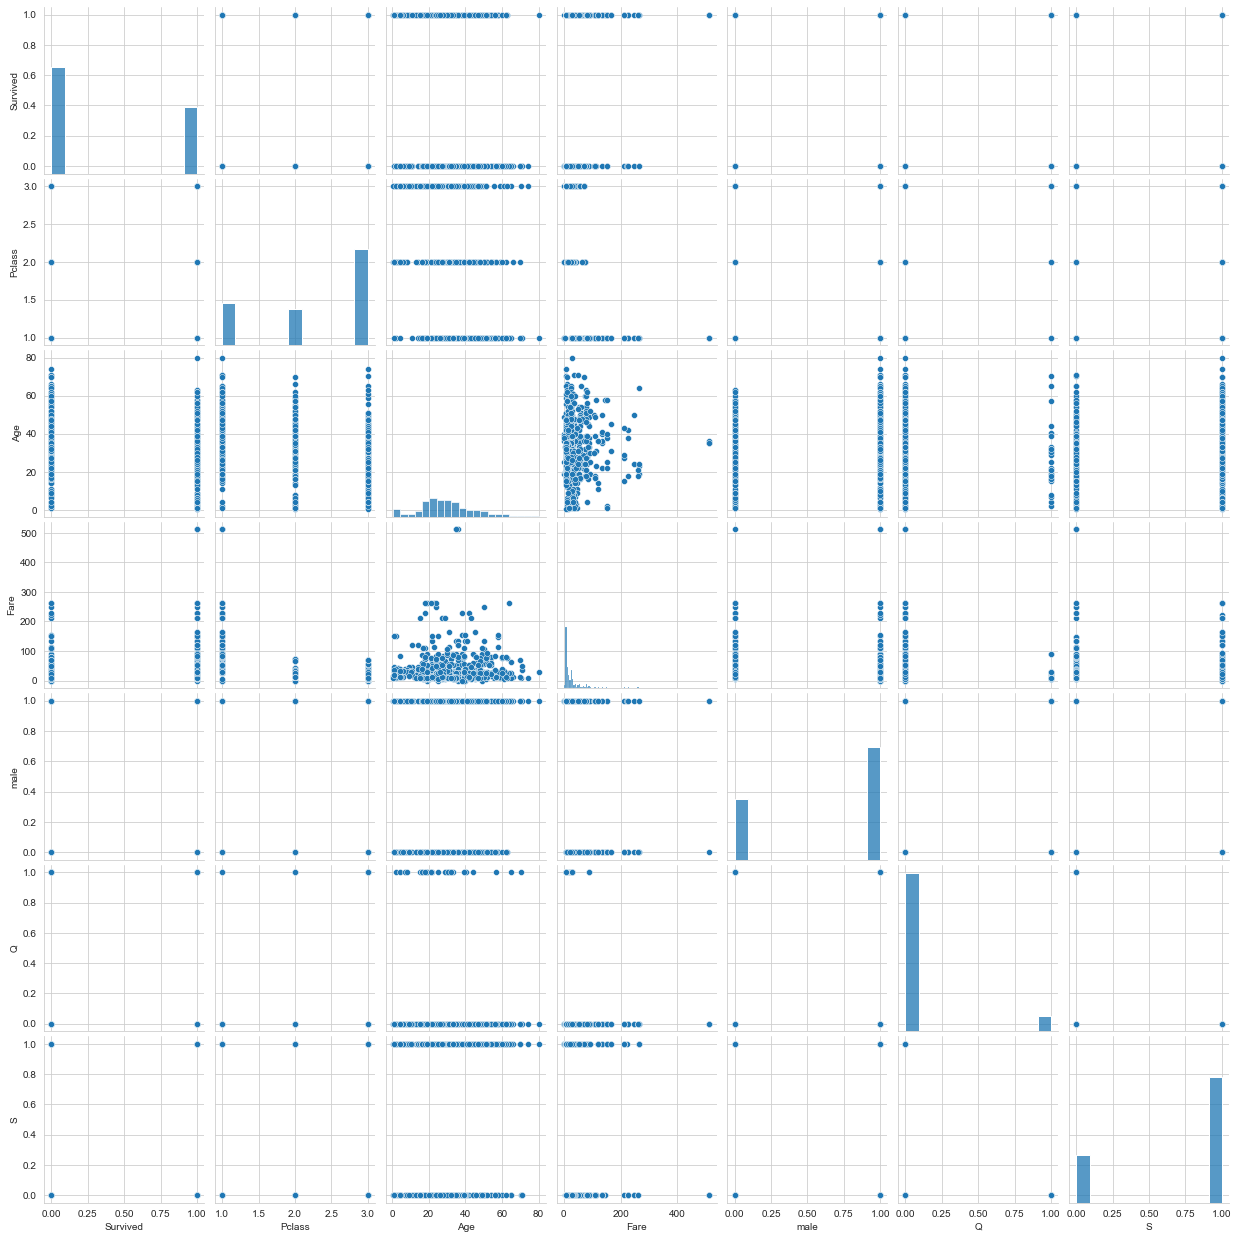

In [86]:
sns.pairplot(train)
plt.show()

<AxesSubplot:>

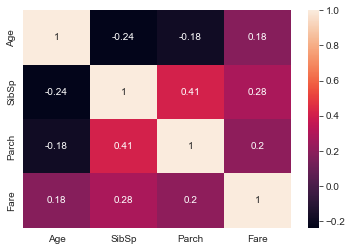

In [216]:
sns.heatmap(train.corr(),annot=True)

In [172]:
# From the above we can conclude that there is high corealtion between SibSp and Parch and also Sibsp and Fare as more prople
# travelling more fare will be required aslo Survived and Fare column.

# Now lets jump into Converting Categorical Features

In [173]:
# since Embarked column and Sex column are two categorical column we will convert categorical features to 
# dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in 
# those features as inputs.


In [217]:
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)
Sex= pd.get_dummies(train['Sex'],drop_first=True)

In [218]:
train.drop(['Embarked','Sex','Name','Ticket'],inplace=True,axis=1)

In [219]:
train=pd.concat([train,Sex,Embarked],axis=1)

In [220]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [221]:
# Now I feel that there are two columns for parch and Sibsb which both defines family members,lets create one column and include
# both of them with a family size (small,medium,large)

In [222]:
train['Family']=train['SibSp']+train['Parch']

In [223]:
train.sample(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Family
419,0,3,10.0,0,2,24.1500,0,2
584,0,3,25.0,0,0,8.7125,1,0
334,1,1,37.0,1,0,133.6500,0,1
123,1,2,32.5,0,0,13.0000,0,0
386,0,3,1.0,5,2,46.9000,1,7


In [224]:
def famly_size(number):
    if number==0:
        return 'Alone'
    elif number>=1 and number<=3:
        return 'Medium'
    else:
        return 'Large'

In [225]:
train['Family']=train['Family'].apply(famly_size)

In [226]:
train.drop(columns=['SibSp','Parch'],inplace=True)
train.head()

,Survived,Pclass,Age,Fare,male,Family
0,0,3,22.0,7.2500,1,Medium
1,1,1,38.0,71.2833,0,Medium
2,1,3,26.0,7.9250,0,Alone
3,1,1,35.0,53.1000,0,Medium
4,0,3,35.0,8.0500,1,Alone


In [227]:
pd.crosstab(train['Family'],train['Survived']).apply(lambda x:round(x/(x.sum())*100))

Survived,0,1
Family,,
Alone,69.0,48.0
Large,9.0,2.0
Medium,22.0,50.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

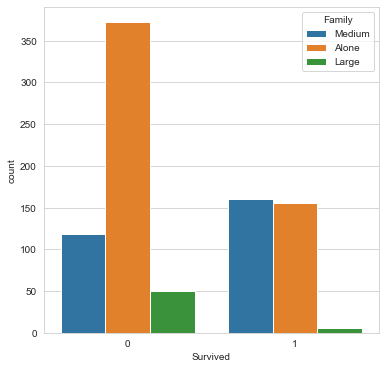

In [228]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',hue='Family',data=train)

## Number of people died in accident were alone

In [229]:
# From above observation we can detech that person who were travelling alone the chaces of survival is very less compares to 
# who are having faimlies with them.

<AxesSubplot:>

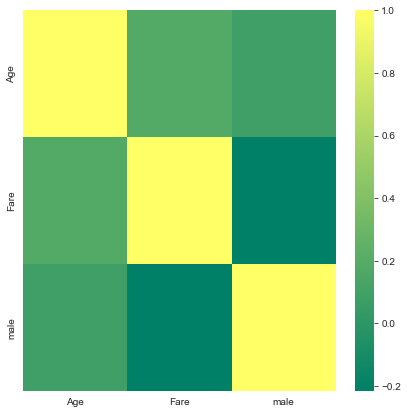

In [230]:
plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),cmap='summer')

In [231]:
train['Survived']=train['Survived'].astype('int')
train['Pclass']=train['Pclass'].astype('int')

In [232]:
Family=pd.get_dummies(train['Family'],drop_first=True)

In [233]:
train=pd.concat([train,Family],axis=1)
train.drop('Family',axis=1,inplace=True)

In [234]:
train

,Survived,Pclass,Age,Fare,male,Large,Medium
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,1
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,0
...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0
887,1,1,19.0,30.0000,0,0,0
888,0,3,25.0,23.4500,0,0,1
889,1,1,26.0,30.0000,1,0,0


In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  862 non-null    int32  
 1   Pclass    862 non-null    int32  
 2   Age       862 non-null    float64
 3   Fare      862 non-null    float64
 4   male      862 non-null    uint8  
 5   Large     862 non-null    uint8  
 6   Medium    862 non-null    uint8  
dtypes: float64(2), int32(2), uint8(3)
memory usage: 29.5 KB


# Yipee your data is ready now!

In [239]:
# X_train, Y_train,X_test,Y_test split

In [241]:
X=train.drop(['Survived',],axis=1)
Y=train.Survived

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=100)

In [244]:
x_train.head()

,Pclass,Age,Fare,male,Large,Medium
60,3,22.0,7.2292,1,0,0
690,1,31.0,57.0000,1,0,1
43,2,3.0,41.5792,0,0,1
505,1,18.0,108.9000,1,0,1
238,2,19.0,10.5000,1,0,0


In [245]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 60 to 537
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  603 non-null    int32  
 1   Age     603 non-null    float64
 2   Fare    603 non-null    float64
 3   male    603 non-null    uint8  
 4   Large   603 non-null    uint8  
 5   Medium  603 non-null    uint8  
dtypes: float64(2), int32(1), uint8(3)
memory usage: 18.3 KB


In [246]:
y_train.head()

60     0
690    1
43     1
505    0
238    0
Name: Survived, dtype: int32

In [247]:
x_train.shape,y_train.shape

((603, 6), (603,))

In [248]:
# Applying Logistic regression

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [250]:
model=LogisticRegression()

In [251]:
model.fit(x_train,y_train)

LogisticRegression()

In [252]:
y_predict=model.predict(x_test)

In [253]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [254]:
accuracy_score(y_test,y_predict)

0.8223938223938224

In [255]:
confusion_matrix(y_test,y_predict)

array([[144,  25],
       [ 21,  69]], dtype=int64)